In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans
import sklearn.metrics as m


In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
x=df[['sepal_length_in_cm','sepal_width_in_cm']]
kmeans=KMeans(3)
kmeans.fit(x)
centroids=kmeans.cluster_centers_

print(centroids)
print(kmeans.labels_)

[[6.81276596 3.07446809]
 [5.006      3.418     ]
 [5.77358491 2.69245283]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [4]:
y=df['class']
ypredit=kmeans.predict(x)
print(m.adjusted_rand_score(y,ypredit))

0.6006861021484542


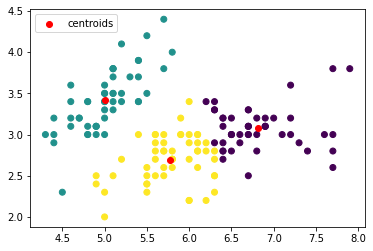

In [5]:
plt.scatter(df['sepal_length_in_cm'],df['sepal_width_in_cm'],c=kmeans.labels_.astype(float)) 
plt.scatter(centroids[:,0],centroids[:,1],c="r",label="centroids")
plt.legend(loc="upper left")

In [6]:
kmeans.predict([[0,0],[55,30]])


C:\Users\WhiteLuce SIS\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 0])

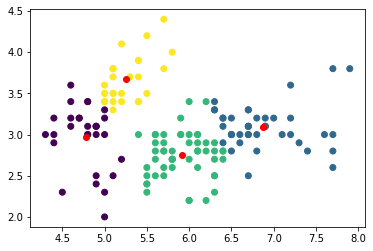

0.36126291529971233


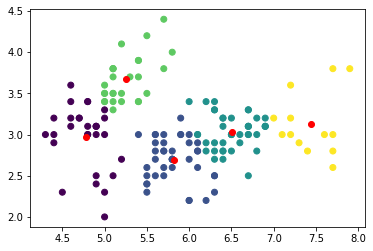

0.35543348815052994


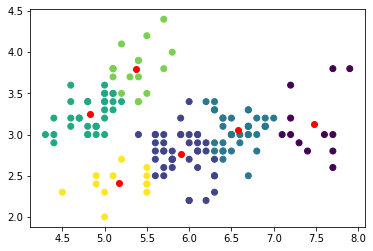

0.3667676524514413


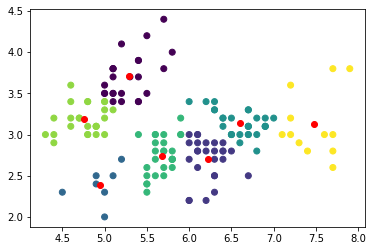

0.3123112933377319


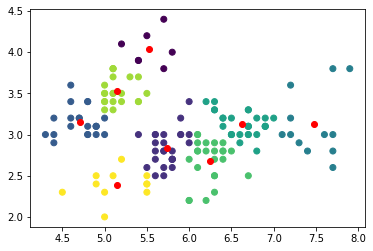

0.26566757058032536


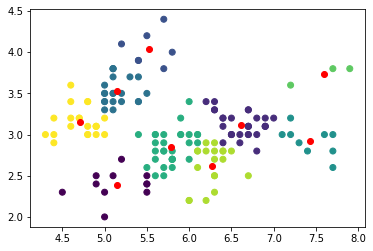

0.26507489560586905


In [7]:
from sklearn.metrics import adjusted_rand_score
#mesure la stabilité du partionnement
y=df['class']
for i in range(4,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    ypredit=kmeans.predict(x)
    centroids=kmeans.cluster_centers_
    plt.scatter(df['sepal_length_in_cm'],df['sepal_width_in_cm'],c=kmeans.labels_.astype(float))
    plt.scatter(centroids[:,0],centroids[:,1],c="r",label="centroids")
    plt.show()
    print(adjusted_rand_score(y,ypredit))

In [8]:
#Exercice2 
data=pd.read_csv('iris.csv')
x=data[['petal_length_in_cm','petal_width_in_cm']]
y=data['class']
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(x,y)

DecisionTreeClassifier(max_depth=2)

In [9]:
!pip install graphviz

In [10]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os as os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
export_graphviz(
        tree,
        out_file=os.path.join(IMAGES_PATH, "tree.dot"),
        feature_names=["petal length", "petal width"],
        rounded=True,
        filled=True
    )

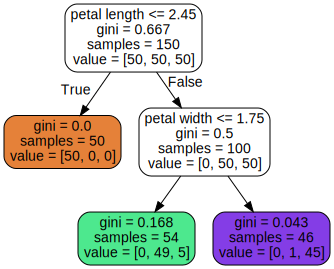

In [11]:
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

In [12]:
l=[]
for i in df["class"]:
    if i=="Iris-setosa":
        l.append(0)
    if i=="Iris-versicolor":
        l.append(1)
    if i=="Iris-virginica":
        l.append(2) 
print(l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


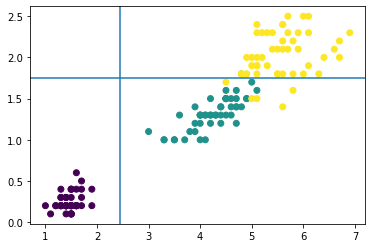

In [13]:
plt.scatter(x["petal_length_in_cm"],x["petal_width_in_cm"],c=l)
plt.axvline(x=2.45)
plt.axhline(y=1.75)
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x, y)
ypredit=rf.predict(x)
rf.score(x,y)

0.9666666666666667

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [16]:
rf2 = RandomForestClassifier(max_depth=2, random_state=0)
rf2.fit(X_train, y_train)
ypredit=rf.predict(X_test)
rf.score(X_test,y_test)

0.9736842105263158

In [17]:
dt = DecisionTreeClassifier(max_depth=2,random_state=42)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9210526315789473